data_load_attempt

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *

In [3]:
from visuberg import *
from fastai.model import *
from fastai.dataset import *
from fastai.conv_learner import *

In [4]:
PATH  = "data/"
TRAIN = "train/"
VALID = "valid/"
TEST  = "test/"

In [5]:
train_data = pd.read_json(PATH+TRAIN+'train.json')

In [7]:
img = train_data.loc[0, ['band_1', 'band_2']]
img = np.stack([img['band_1'], img['band_2']], -1).reshape(75,75,2)

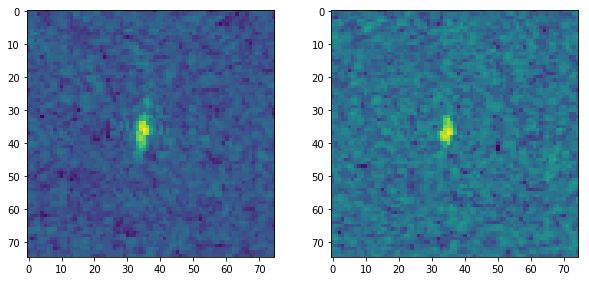

In [8]:
fig = plt.figure(1, figsize=(10,10))

# Band 1
ax = fig.add_subplot(2,2,1)
ax.imshow(img[:,:,0])
# Band 2
ax = fig.add_subplot(2,2,2)
ax.imshow(img[:,:,1])


In [9]:
train_data.loc[0, ['is_iceberg']]

is_iceberg    0
Name: 0, dtype: object

In [10]:
train_data.loc[0, ['is_iceberg']][0]

0

In [11]:
train_data_array = []
train_label_array = []

for idx in range(len(train_data)):
    img = train_data.loc[idx, ['band_1', 'band_2']]
    img = np.stack([img['band_1'], img['band_2']], -1).reshape(75,75,2).astype('float')
    train_data_array.append(img)
    train_label_array.append(train_data.loc[idx, ['is_iceberg']])

train_data_array = np.array(train_data_array)
train_label_array = np.array(train_label_array)

In [42]:
# Data:
# train_data_array
# train_label_array

In [12]:
ARCH = resnet34

In [13]:
# train_data_array.astype('double')
train_data_array.dtype

dtype('float64')

In [15]:
resnet_data = ImageClassifierData.from_arrays(PATH, (train_data_array, train_label_array),
                                              (train_data_array, train_label_array), bs=16)